#Modelo base

Al diseñar un nuevo modelo de I.A., es muy tentador lanzarse directamente a la investigación e implementar una solución de aprendizaje profundo de vanguardia, sin embargo, en ese punto se debe construir una base de referencia decente primero. 

Muchos científicos de datos subestiman la importancia de tener una línea de base.

Existen modelos de referencia que ofrecen el 90% del valor por el 10% del esfuerzo.

Un modelo con una precisión del 80% en 2 días es mejor que un modelo con una precisión del 81,5% en 4 semanas y eso es lo importante cuando se trabaja con clientes. La belleza de un modelo de línea de base decente es que es muy difícil de superar y los modelos de vanguardia lograrán solo una mejora marginal sobre él. Hay algunos requisitos para un buen modelo de línea de base:




*   El modelo de línea de base debe ser simple. Es menos probable que los modelos simples se ajusten demasiado. Si ve que su línea de base ya está sobreajustada, no tiene sentido optar por un modelado más complejo, ya que la complejidad matará el rendimiento.
*   El modelo de referencia debe ser interpretable. La explicabilidad lo ayudará a comprender mejor sus datos y le mostrará una dirección para la ingeniería de funciones.


Estas dos razones nos llevan a la elección más vaible: la familia del árbol de decisiones. Otro hecho sorprendente sobre los árboles es que los modelos basados ​​en árboles no son paramétricos y no requieren que los datos se distribuyan normalmente como en las redes neuronales.


#Preparación de los datos

Como en todo modelo de I.A. se deben preparar los datos.

En este caso se usarán datos tipo serie de tiempo, del El tiempo registrado por el Instituto Max Planck de Biogeoquímica y se prepararán para hacer un modelo con arboles de descición.

Más detalles de preparar datos para series temporales en:

https://github.com/Jose-Alonso-Nochebuena-Mercado/Inspeccion-comprension-y-limpieza-de-series-de-tiempo/blob/main/_Inspección-comprensión-y-limpieza-de-series-de-tiempo.ipynb

In [1]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from statsmodels.graphics.tsaplots import plot_acf
import random
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.tsa.stattools import kpss
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Funciones

In [2]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df, val_df, test_df,
               label_columns=None):
    
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df
    self.label_columns = label_columns

    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

 
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)


  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True)

  ds = ds.map(self.split_window)

  return ds
#Con batch
"""
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)
  ds = ds.map(self.split_window)

  return ds
"""
WindowGenerator.make_dataset = make_dataset
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
df = pd.read_csv(csv_path)
df = df[5::6]
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0
max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0
df['wv (m/s)'].min()
wv = df['wv (m/s)']
max_wv = df.pop('max. wv (m/s)')
wd_rad = df.pop('wd (deg)')*np.pi / 180
df['wx'] = wv*np.cos(wd_rad)
df['wy'] = wv*np.sin(wd_rad)
df['max wx'] = max_wv*np.cos(wd_rad)
df['max wy'] = max_wv*np.sin(wd_rad)
timestamp_s = date_time.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day
df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
column_indices = {name: i for i, name in enumerate(df.columns)}
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]
num_features = df.shape[1]


haremos una ventana de entreda=1 y predecir un valor a futuro

In [4]:
w = WindowGenerator(input_width=1, label_width=1, shift=1,
                     train_df=train_df, val_df=val_df, test_df=test_df,
                     label_columns=['T (degC)'])
for example_inputs, example_labels in w.val.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (128, 1, 20)
Labels shape (batch, time, features): (128, 1, 1)


In [5]:
print(w.train)

<MapDataset shapes: ((None, 1, 20), (None, 1, 1)), types: (tf.float32, tf.float32)>


#Modelo: Árbol de desición

Los arboles de decisión son representaciones gráficas de posibles soluciones a una decisión basadas en ciertas condiciones, es uno de los algoritmos de aprendizaje supervisado más utilizados en machine learning y pueden realizar tareas de clasificación o regresión (acrónimo del inglés CART). La comprensión de su funcionamiento suele ser simple y a la vez muy potente.

Utilizamos mentalmente estructuras de árbol de decisión constantemente en nuestra vida diaria sin darnos cuenta:


¿Llueve? => lleva paraguas. ¿Soleado? => lleva gafas de sol. ¿estoy cansado? => toma café. (decisiones del tipo IF THIS THEN THAT)

Los árboles de decisión tienen un primer nodo llamado raíz (root) y luego se descomponen el resto de atributos de entrada en dos ramas (podrían ser más, pero no nos meteremos en eso ahora) planteando una condición que puede ser cierta o falsa. Se bifurca cada nodo en 2 y vuelven a subdividirse hasta llegar a las hojas que son los nodos finales y que equivalen a respuestas a la solución: Si/No, Comprar/Vender, o lo que sea que estemos clasificando.

Otro ejemplo son los populares juegos de adivinanza:

¿Animal ó vegetal? -Animal
¿Tiene cuatro patas? -Si
¿Hace guau? -Si
-> Es un perro!

Para obtener el árbol óptimo y valorar cada subdivisión entre todos los árboles posibles y conseguir el nodo raiz y los subsiguientes, el algoritmo deberá medir de alguna manera las predicciones logradas y valorarlas para comparar de entre todas y obtener la mejor. Para medir y valorar, utiliza diversas funciones, siendo las más conocidas y usadas los “Indice gini” y “Ganancia de información” que utiliza la denominada “entropía“. La división de nodos continuará hasta que lleguemos a la profundidad máxima posible del árbol ó se limiten los nodos a una cantidad mínima de muestras en cada hoja. A continuación describiremos muy brevemente cada una de las estrategias nombradas:

##Indice de Gini

Se utiliza para atributos con valores continuos (precio de una casa). Esta función de coste mide el “grado de impureza” de los nodos, es decir, cuán desordenados o mezclados quedan los nodos una vez divididos. Deberemos minimizar ese GINI index.

##Ganancia de información

Se utiliza para atributos categóricos (cómo en hombre/mujer). Este criterio intenta estimar la información que aporta cada atributo basado en la “teoría de la información“. Para medir la aleatoriedad de incertidumbre de un valor aleatorio de una variable “X” se define la Entropia.
Al obtener la medida de entropía de cada atributo, podemos calcular la ganancia de información del árbol. Deberemos maximizar esa ganancia.

##Scores

Como en todo, se necesitan métricas para definir que tan buena es una cosa que otra, se agrega un link para revisar el tipo de métricas qeu existen

https://scikit-learn.org/stable/modules/model_evaluation.html

##Entrenamiento

In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [7]:
for x, y in w.train.take(1):  
    x_train = x.numpy()
    y_train = y.numpy()

In [8]:
for x, y in w.val.take(1):  
    x_val = x.numpy()
    y_val = y.numpy()

In [9]:
x_train=np.reshape(x_train,(128,20))
y_train=np.reshape(y_train,(128))

x_val=np.reshape(x_val,(128,20))
y_val=np.reshape(y_val,(128))

In [10]:
print(y_train.shape)

(128,)


In [18]:
r2_list = list()
e2m_list = list()
max_attributes = 20
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    tree_model = tree.DecisionTreeRegressor(min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth)
    model = tree_model.fit(X = x_train, y=y_train) 
    valid_r2 = model.score(X = x_val, y=y_val) # calculamos la precision con el segmento de validacion R2 score
    r2_list.append(valid_r2)

    preds = model.predict(x_val)
    e2m_list=mean_squared_error(y_val, preds)
    
# Mostramos los resultados obtenidos
df2 = pd.DataFrame({"Max Depth": depth_range, "R2 score": r2_list,"E2M": e2m_list})
df2 = df2[["Max Depth", "R2 score","E2M"]]
print(df2.to_string(index=False))

 Max Depth  R2 score       E2M
         1  0.607158  3.467256
         2  0.839977  3.467256
         3  0.935869  3.467256
         4  0.941347  3.467256
         5  0.941347  3.467256
         6  0.936224  3.467256
         7  0.936056  3.467256
         8  0.941347  3.467256
         9  0.936224  3.467256
        10  0.941179  3.467256
        11  0.936224  3.467256
        12  0.936056  3.467256
        13  0.936224  3.467256
        14  0.936056  3.467256
        15  0.936224  3.467256
        16  0.941347  3.467256
        17  0.941347  3.467256
        18  0.936224  3.467256
        19  0.936056  3.467256
        20  0.936224  3.467256


Observamos que con una profundidad de 4 obtenemos buenos resultados

In [32]:
tree_model = tree.DecisionTreeRegressor(min_samples_split=20,
                                             min_samples_leaf=1,
                                             max_depth = 10)
model = tree_model.fit(X = x_train, y=y_train) 
valid_r2 = model.score(X = x_val, y=y_val) # calculamos la precision con el segmento de validacion R2 score
print(valid_r2)

preds = model.predict(x_val)
print(mean_squared_error(y_val, preds))

0.9339209713733713
3.592453169247338


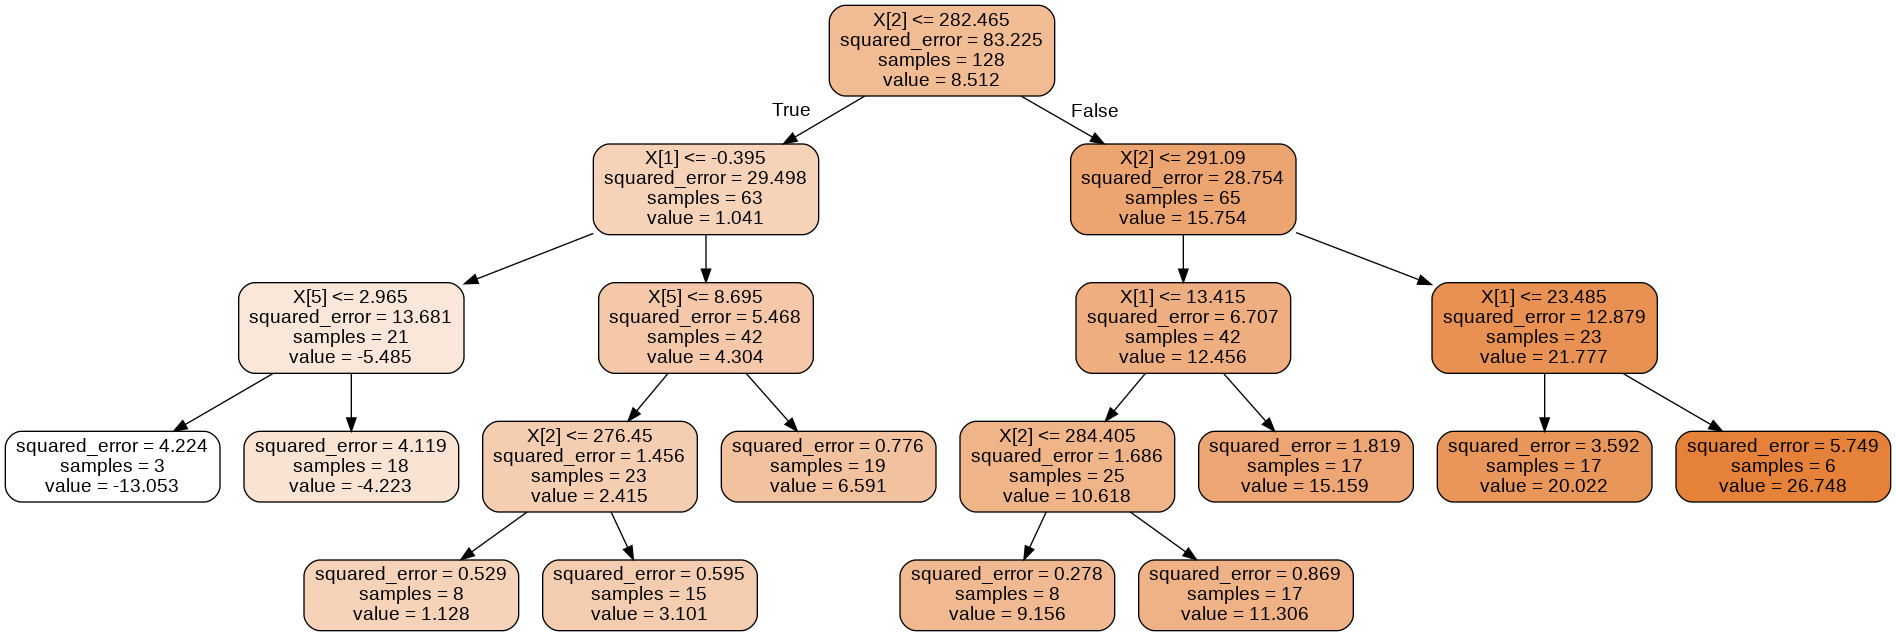

In [33]:
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(model,
                              out_file=f,
                              max_depth = 20,
                              impurity = True,
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

In [16]:
for i, col in enumerate(df.columns):
    print(i,col)

0 p (mbar)
1 T (degC)
2 Tpot (K)
3 Tdew (degC)
4 rh (%)
5 VPmax (mbar)
6 VPact (mbar)
7 VPdef (mbar)
8 sh (g/kg)
9 H2OC (mmol/mol)
10 rho (g/m**3)
11 wv (m/s)
12 wx
13 wy
14 max wx
15 max wy
16 Day sin
17 Day cos
18 Year sin
19 Year cos


##Resulatdos

In [49]:
muestra=10
x_=np.reshape(x_val[muestra],(1,20))
print('TK: ',x_[0][2])
print('T: ',x_[0][1])
print('VPmax: ',x_[0][5])
print('prediccion: ', model.predict(x_))
print('valor real:',y_val[muestra])
print('Diferencia: ', y_val[muestra]-model.predict(x_)[0])

TK:  278.73
T:  5.38
VPmax:  8.97
prediccion:  [6.5905263]
valor real: 5.1
Diferencia:  -1.4905264001143603


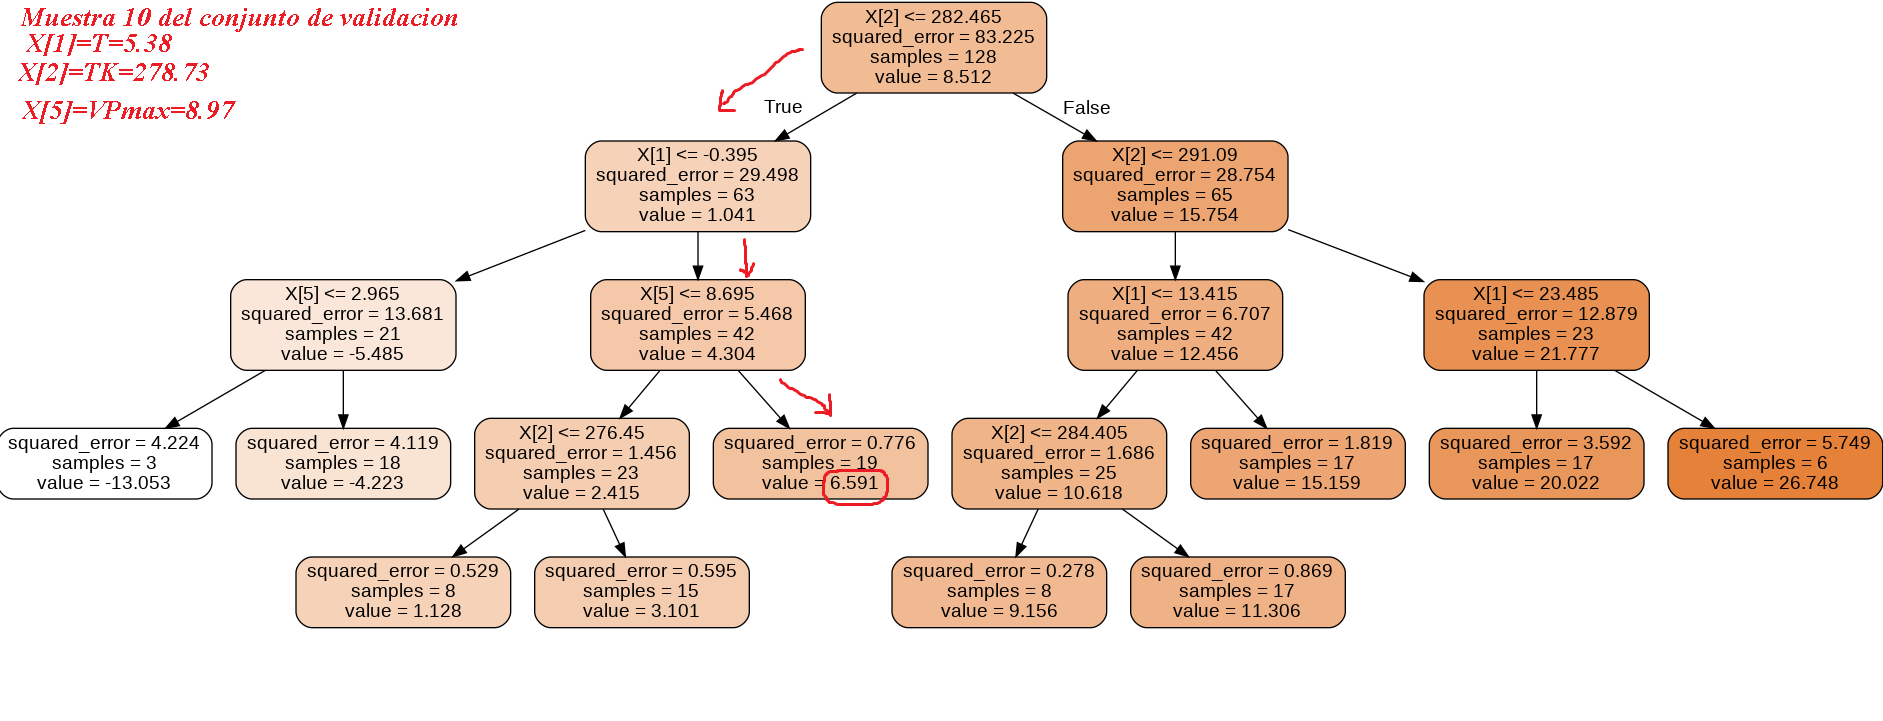

In [50]:
muestra=15
x_=np.reshape(x_val[muestra],(1,20))
print('TK: ',x_[0][2])
print('T: ',x_[0][1])
print('VPmax: ',x_[0][5])
print('prediccion: ', model.predict(x_))
print('valor real:',y_val[muestra])
print('Diferencia: ', y_val[muestra]-model.predict(x_)[0])

TK:  273.41
T:  0.02
VPmax:  6.12
prediccion:  [1.1275]
valor real: 0.24
Diferencia:  -0.8875000057742


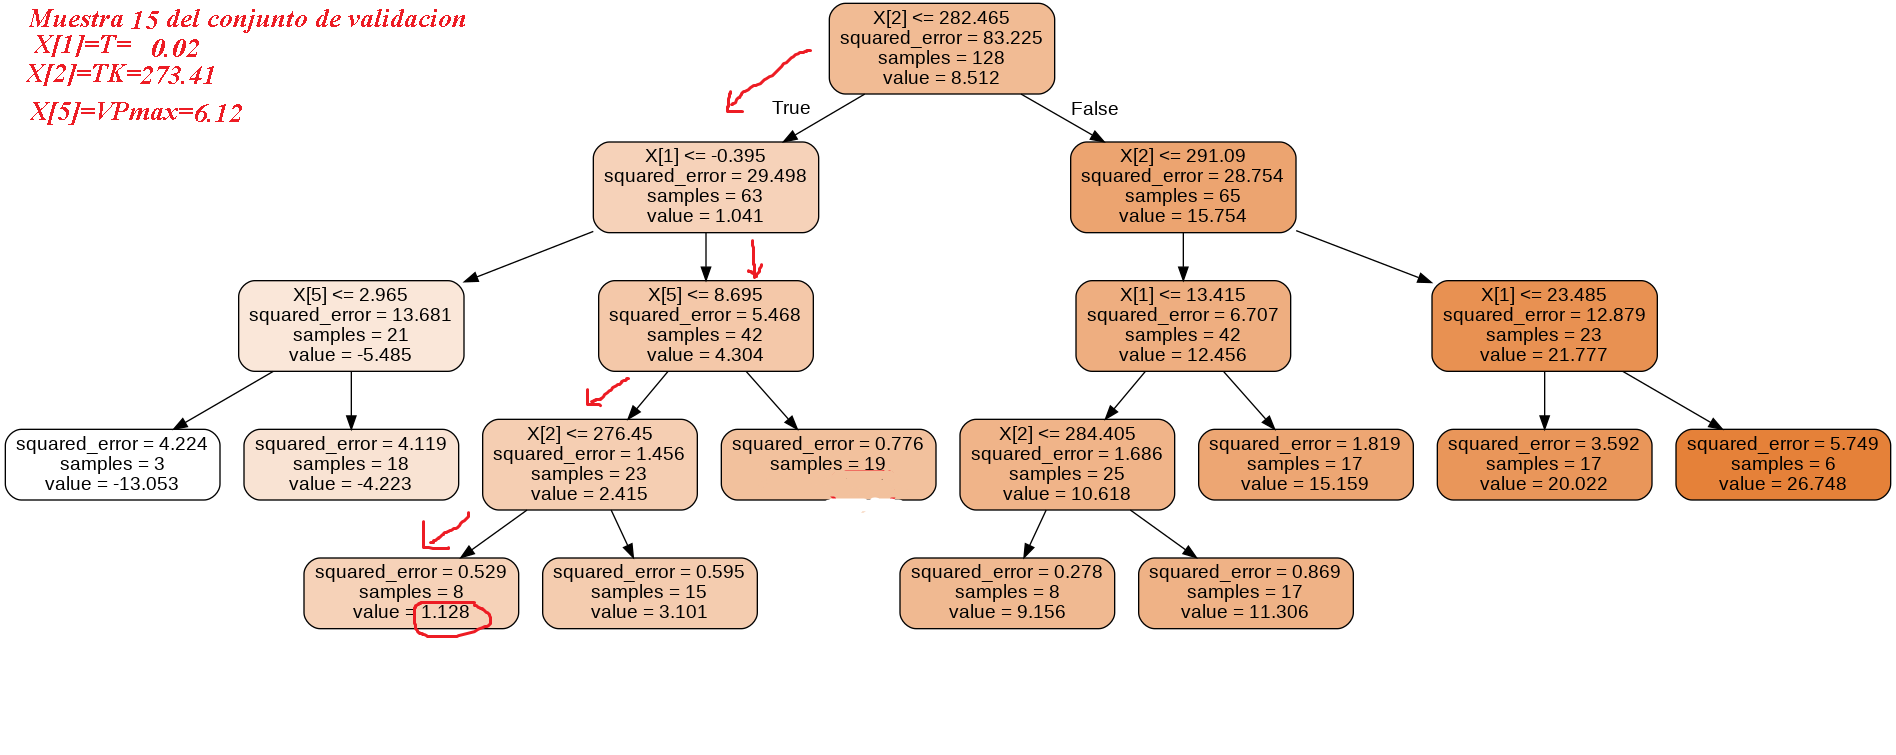